In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_66cca5e93e664e6d96f8fffc40709153 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='voPwJLHoQ1h2VuBU9I8PeDl-eVLTyjtx-zO-urZpAGaO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_66cca5e93e664e6d96f8fffc40709153.get_object(Bucket='tylmlhackathon-donotdelete-pr-kwx3cv5j4zftvm',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df = df_data

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
import pandas as pd
import numpy as np

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [9]:
print('min_age = ',min(df['Age']))
print('max_age = ',max(df['Age']))

min_age =  18
max_age =  70


## Dropping Customer ID column

In [10]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Male and Female count

In [13]:
no_of_male_cust = df[df['Gender']=='Male'].count()
no_of_female_cust = df[df['Gender']=='Female'].count()
print("No of male customers = ",no_of_male_cust.Gender)
print("No of female customers = ",no_of_female_cust.Gender)

No of male customers =  88
No of female customers =  112


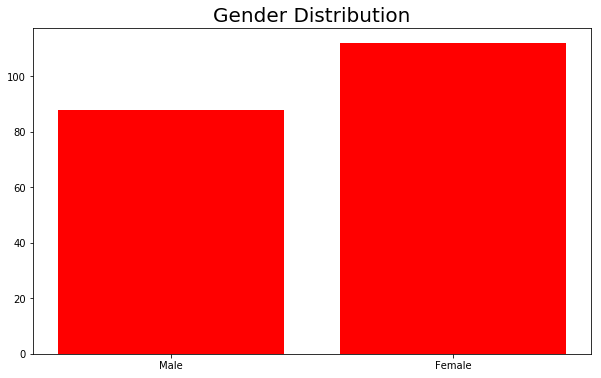

In [14]:
plt.figure(figsize=(10,6))
x = ['Male','Female']
y = [88,112]
plt.bar(x,y,color='r')
plt.title('Gender Distribution',fontsize=20)
plt.show()

## Annual Income and Spending Score

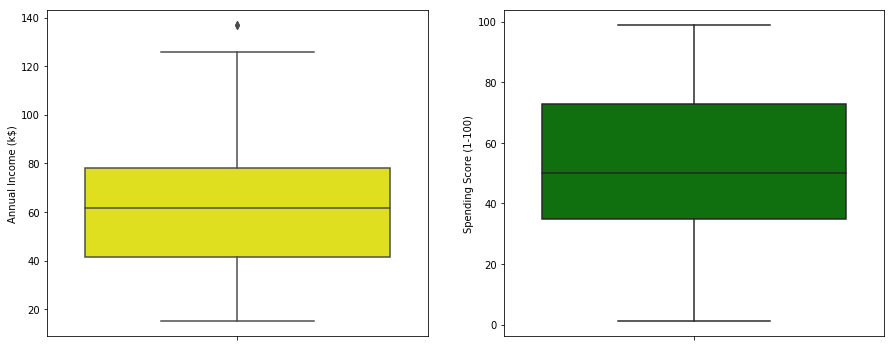

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['Annual Income (k$)'],color='yellow')
plt.subplot(1,2,2)
sns.boxplot(y=df['Spending Score (1-100)'],color='green')
plt.show()

## Age Distribution

In [16]:
age18_25 = df['Age'][(df['Age']>=18) & (df['Age']<=25)]
age26_35 = df['Age'][(df['Age']>=26) & (df['Age']<=35)]
age36_45 = df['Age'][(df['Age']>=36) & (df['Age']<=45)]
age46_55 = df['Age'][(df['Age']>=46) & (df['Age']<=55)]
age56_ = df['Age'][df['Age']>55]

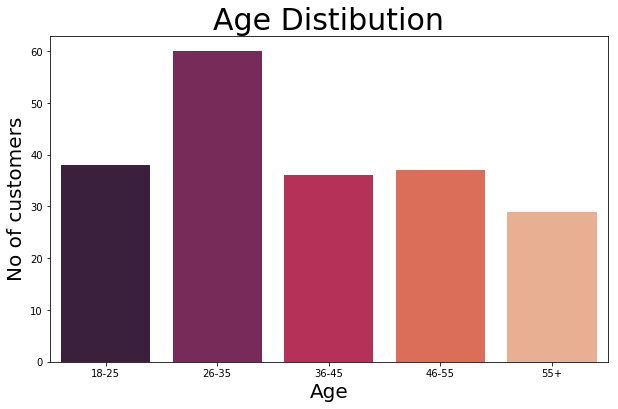

In [18]:
x = ['18-25','26-35','36-45','46-55','55+']
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x,y=y,palette='rocket')
plt.title('Age Distibution',fontsize=30)
plt.xlabel('Age',fontsize=20)
plt.ylabel('No of customers',fontsize=20)
plt.show()

## Spending Score

In [19]:
ss1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1) & (df['Spending Score (1-100)']<=20)]
ss21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) & (df['Spending Score (1-100)']<=40)]
ss41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) & (df['Spending Score (1-100)']<=60)]
ss61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61) & (df['Spending Score (1-100)']<=80)]
ss81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) & (df['Spending Score (1-100)']<=100)]

Text(0, 0.5, 'No of Customers')

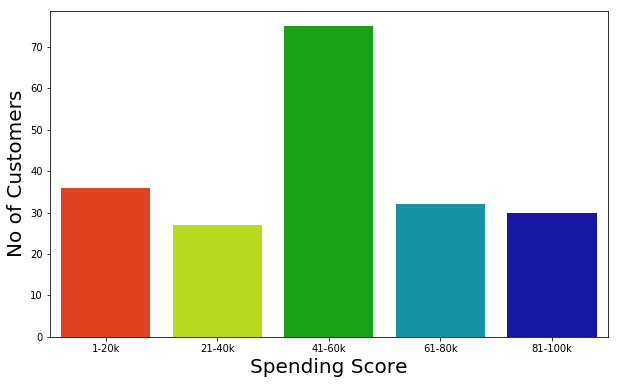

In [20]:
x = ['1-20k','21-40k','41-60k','61-80k','81-100k']
y = [len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x,y=y,palette="nipy_spectral_r")
#plt.title('Spending Score in k$',fontsize=30)
plt.xlabel('Spending Score',fontsize=20)
plt.ylabel('No of Customers',fontsize=20)
#plt.show()

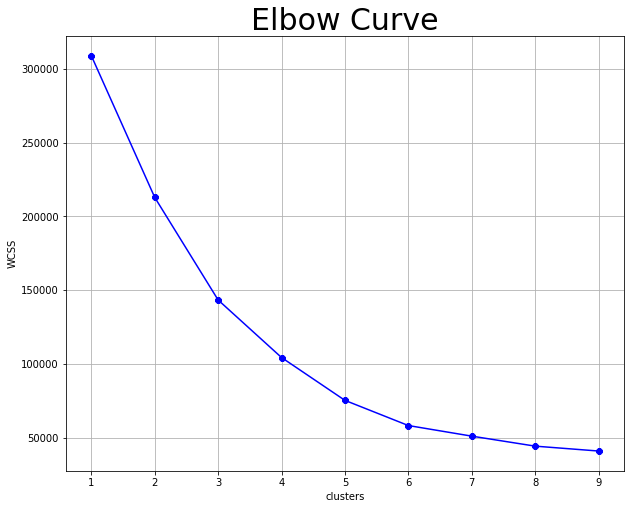

In [84]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wcss,color='blue',marker="8")
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.grid()
plt.title('Elbow Curve',fontsize=30)
plt.show()

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(df.iloc[:,1:])
labels = kmeans.fit_predict(df.iloc[:,1:])
df['Labels'] = labels

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


## 3D plot to visualize different clusters

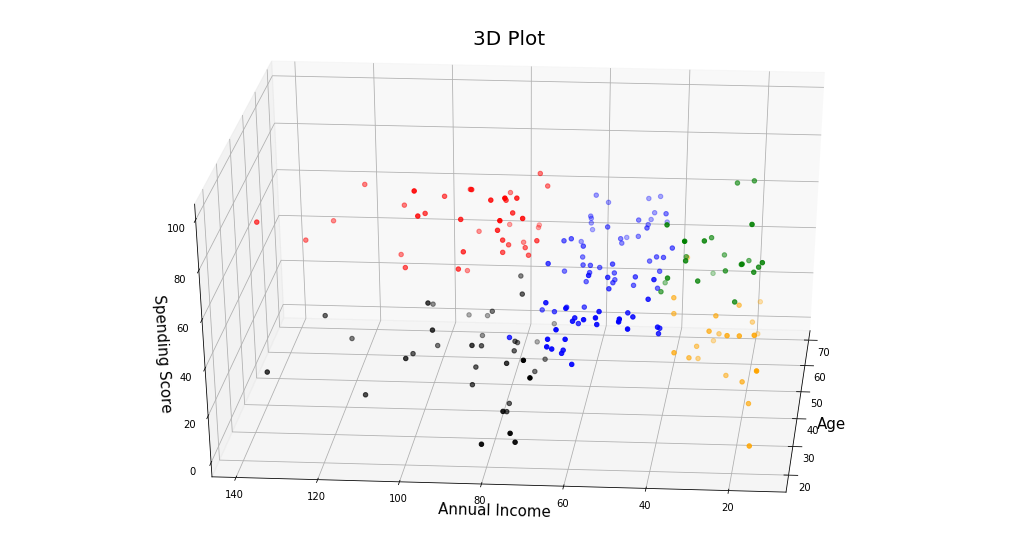

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'][df['Labels']==0], df['Annual Income (k$)'][df['Labels']==0],df['Spending Score (1-100)'][df['Labels']==0], c='red')
ax.scatter(df['Age'][df['Labels']==1], df['Annual Income (k$)'][df['Labels']==1],df['Spending Score (1-100)'][df['Labels']==1], c='blue')
ax.scatter(df['Age'][df['Labels']==2], df['Annual Income (k$)'][df['Labels']==2],df['Spending Score (1-100)'][df['Labels']==2], c='orange')
ax.scatter(df['Age'][df['Labels']==3], df['Annual Income (k$)'][df['Labels']==3],df['Spending Score (1-100)'][df['Labels']==3], c='green')
ax.scatter(df['Age'][df['Labels']==4], df['Annual Income (k$)'][df['Labels']==4],df['Spending Score (1-100)'][df['Labels']==4], c='black')

ax.view_init(30,185)
plt.title('3D Plot',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Annual Income',fontsize=15)
ax.set_zlabel('Spending Score',fontsize=15)
plt.show()